In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv("Netflix Dataset.csv")

In [13]:
print("first 5 row:")
print(df.head())
print("\nInfo:")
print(df.info())
print("\Summary Statistics:")
print(df.describe(include="all"))

first 5 row:
  Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

                  

<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
C:\Users\hp\AppData\Local\Temp\ipykernel_15860\2378408654.py:5: SyntaxWarning: invalid escape sequence '\S'
  print("\Summary Statistics:")


In [14]:
print("\nMissing Value:")
print(df.isnull().sum())


Missing Value:
Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


In [15]:
print("\nDulicate Rows:", df.duplicated().sum())


Dulicate Rows: 2


In [16]:
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

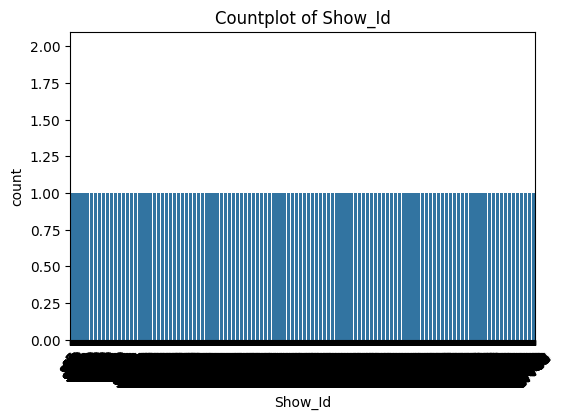

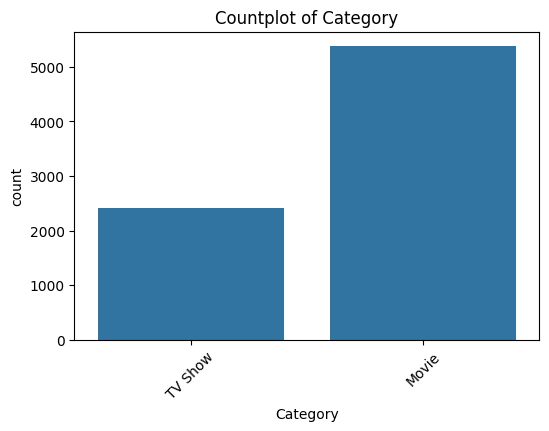

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3649 (\N{THAI CHARACTER SARA AE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3612 (\N{THAI CHARACTER PHO PHUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3657 (\N{TH

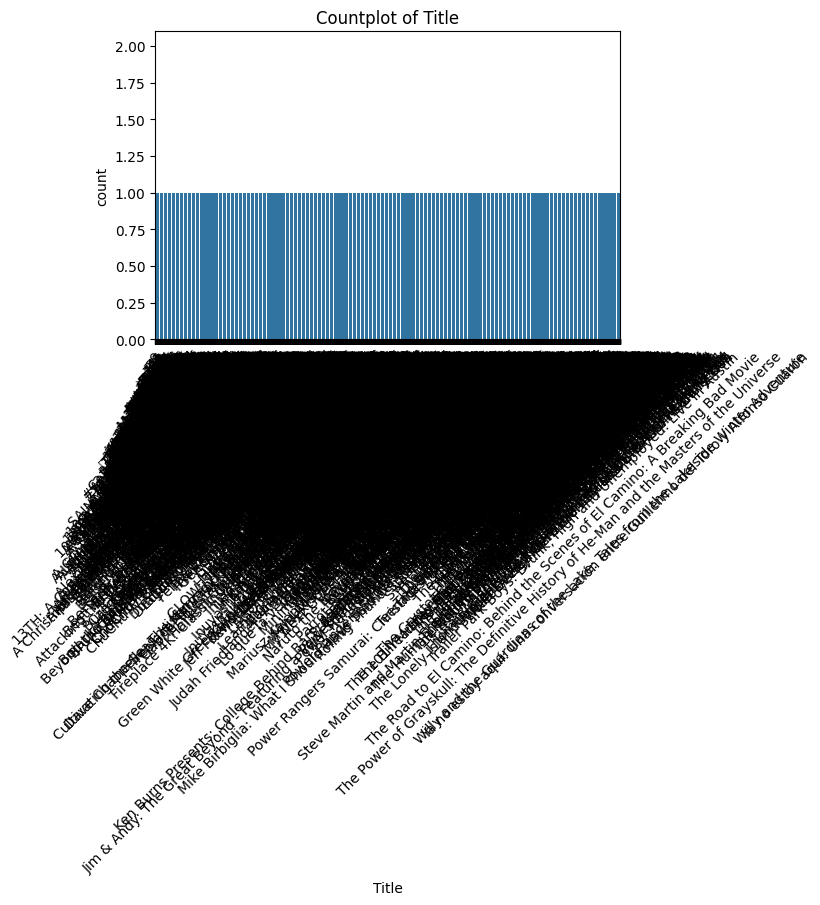

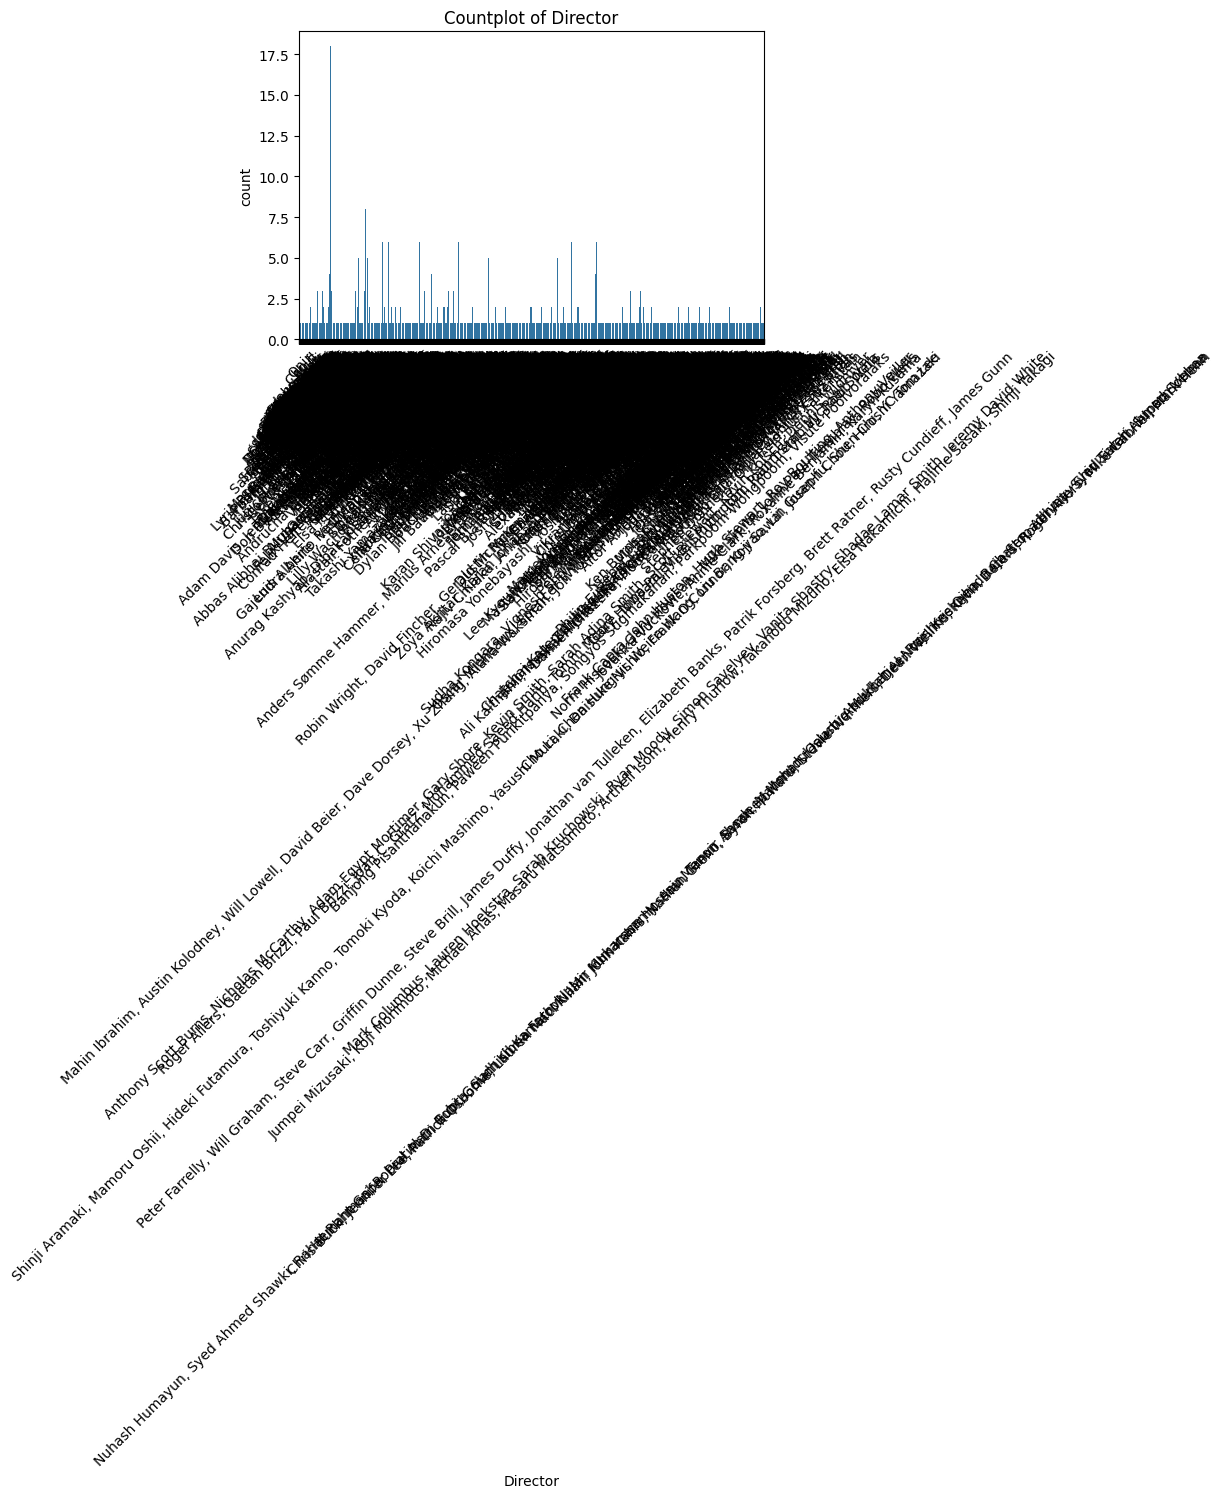

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3657 (\N{THAI CHARACTER MAI THO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


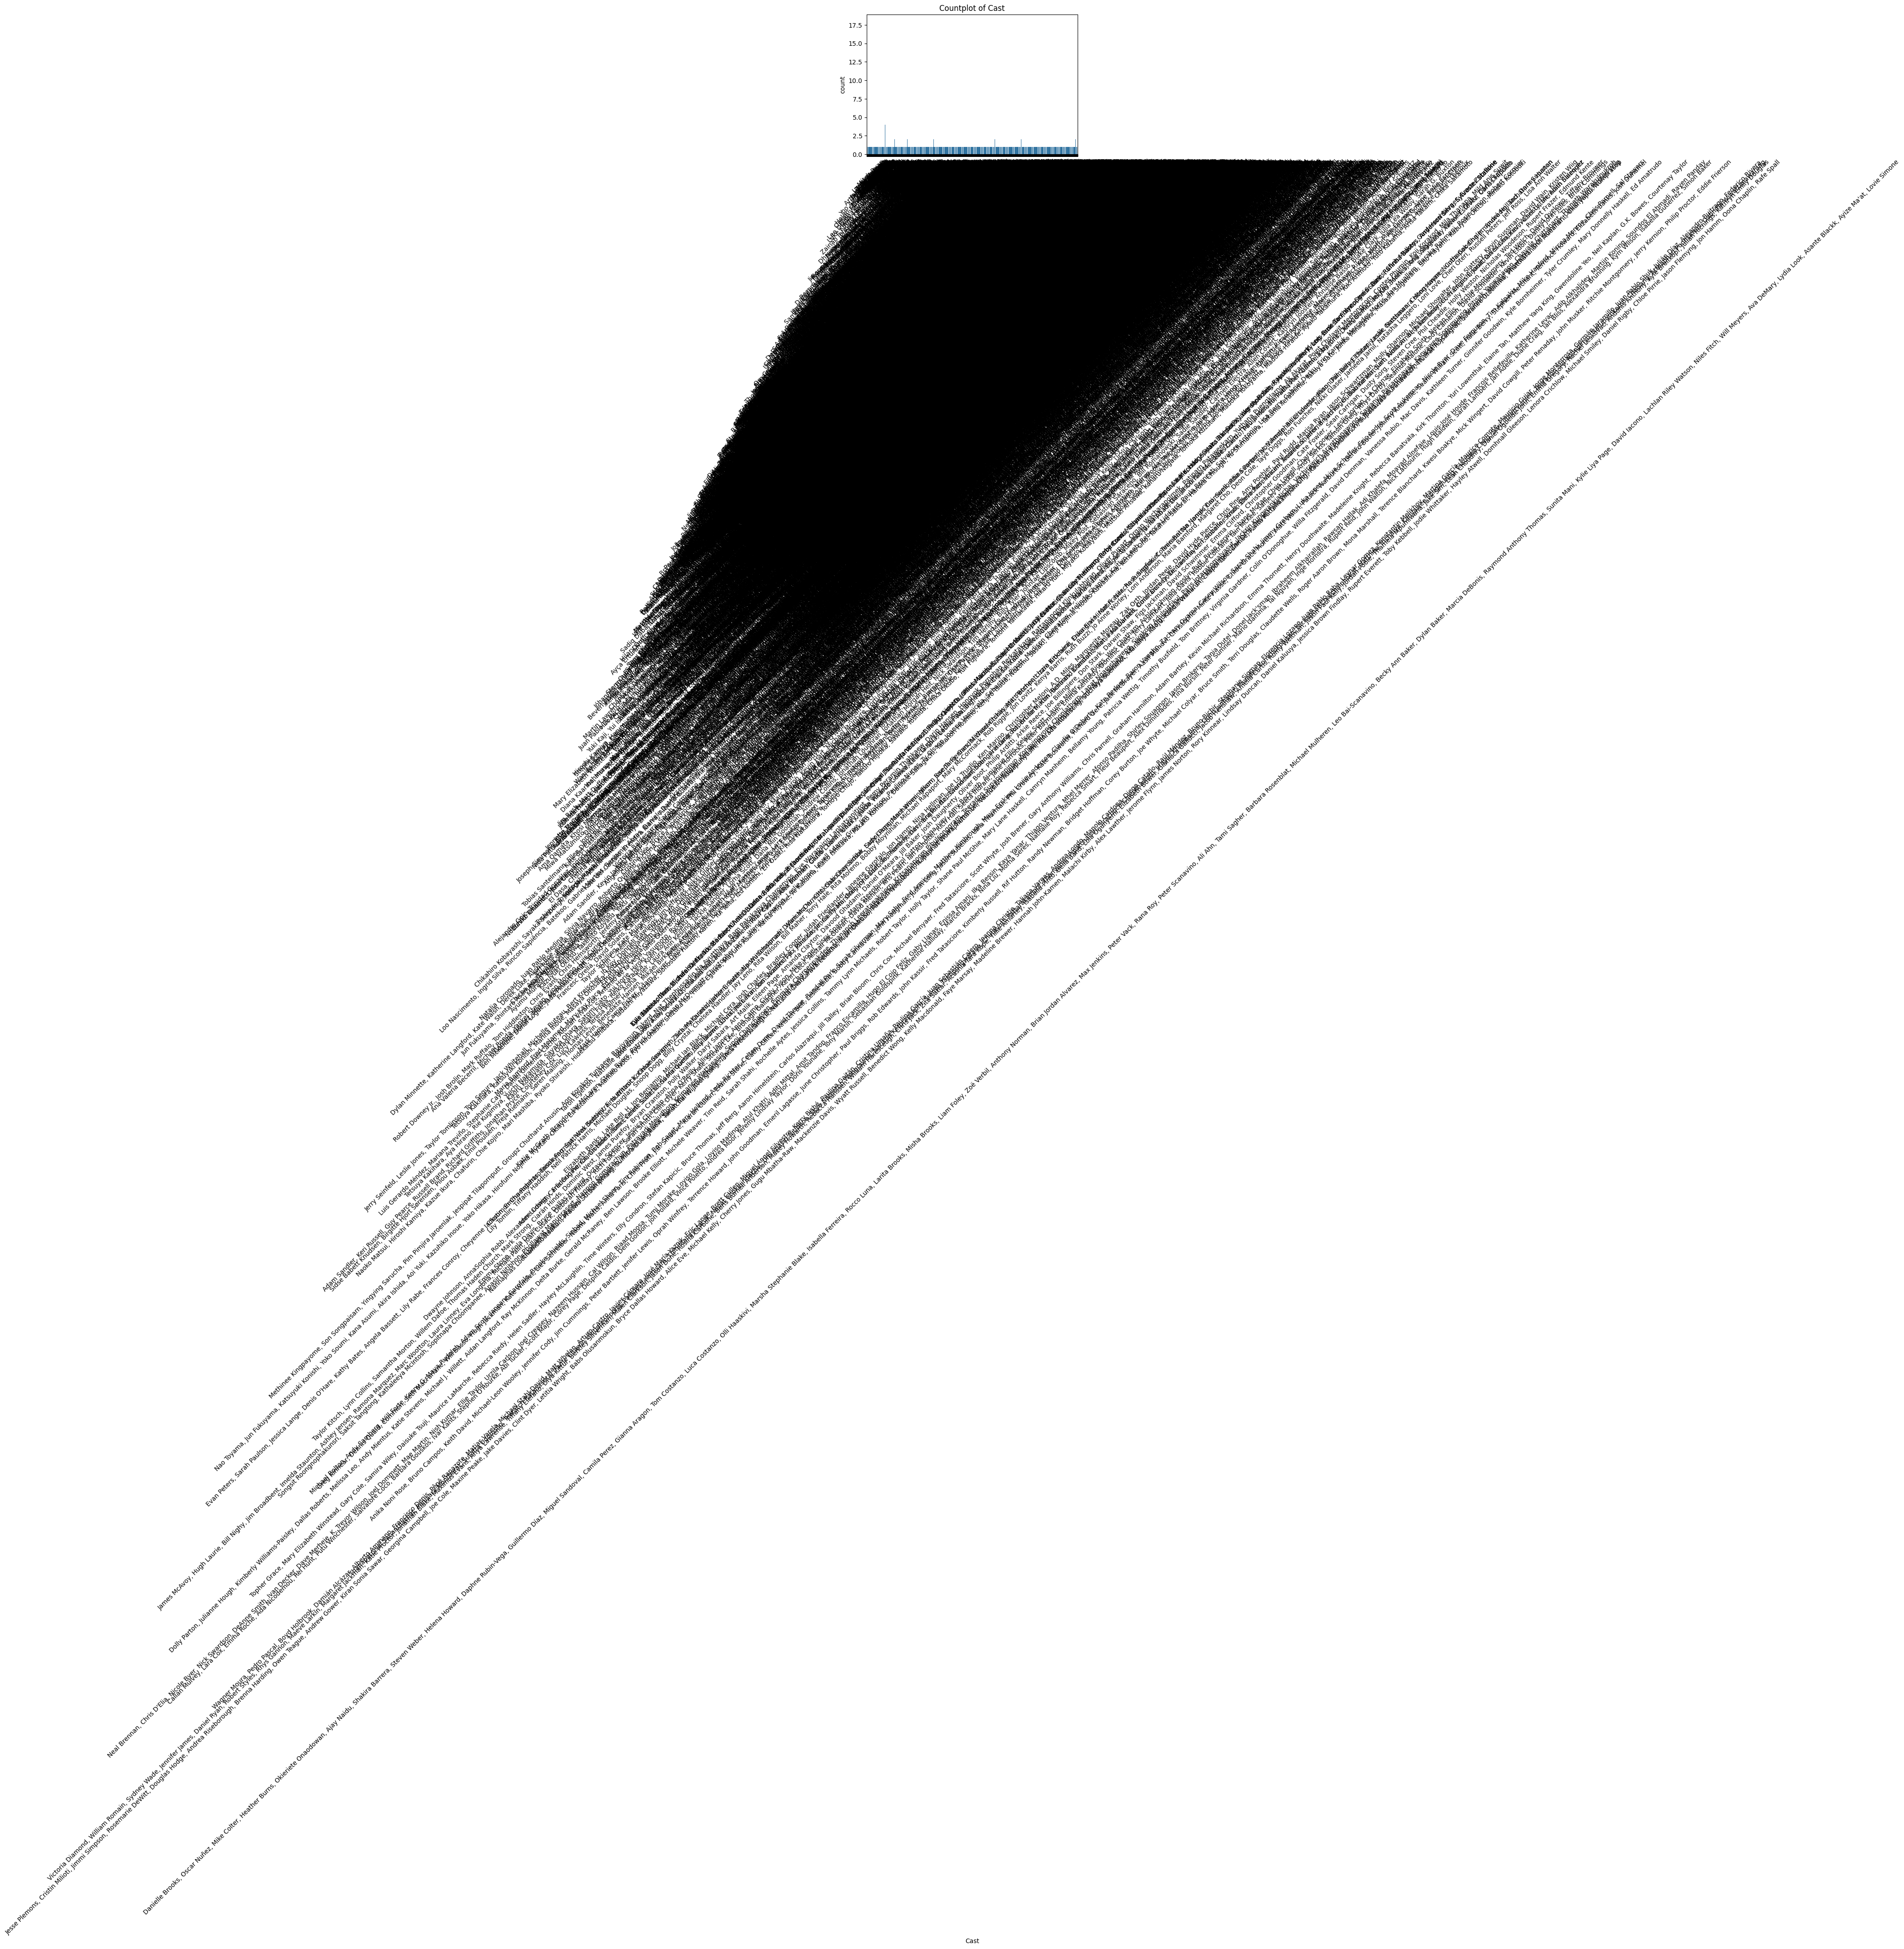

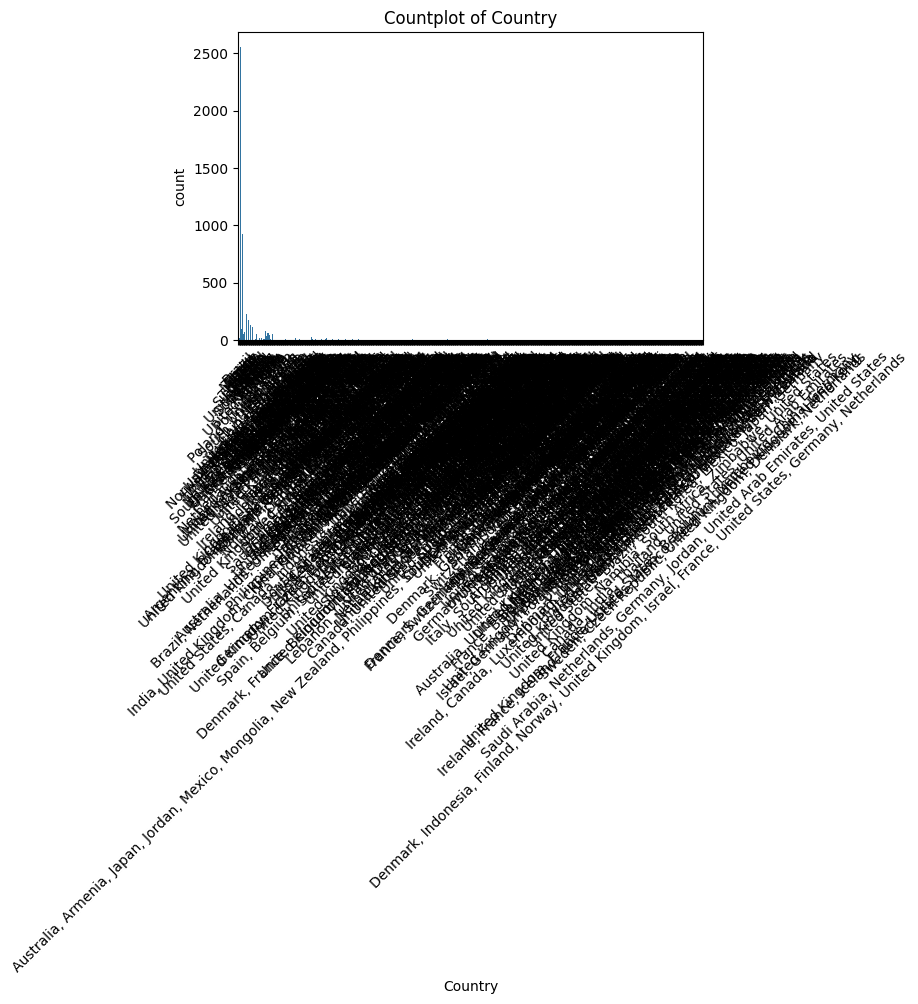

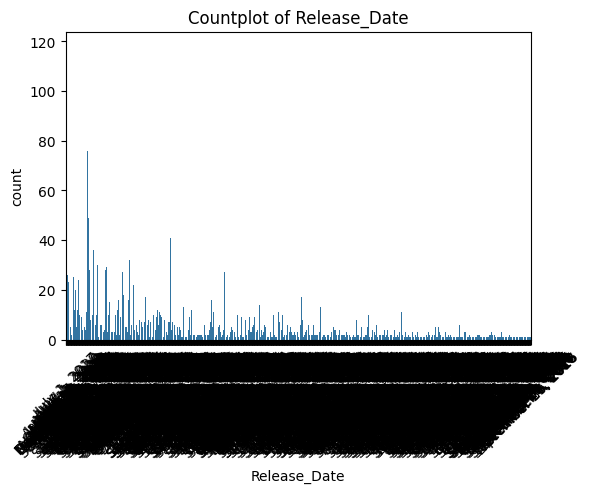

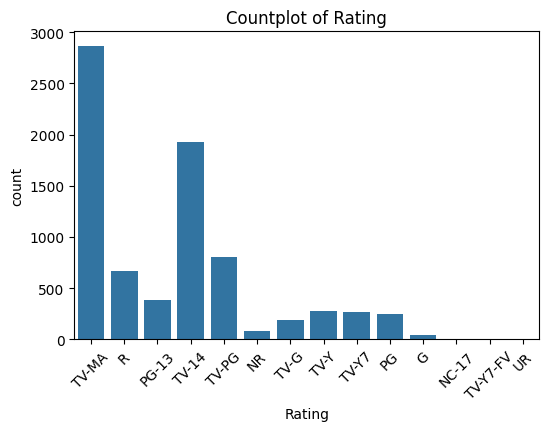

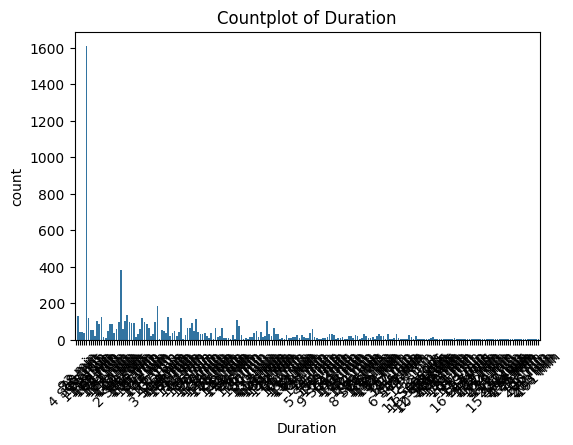

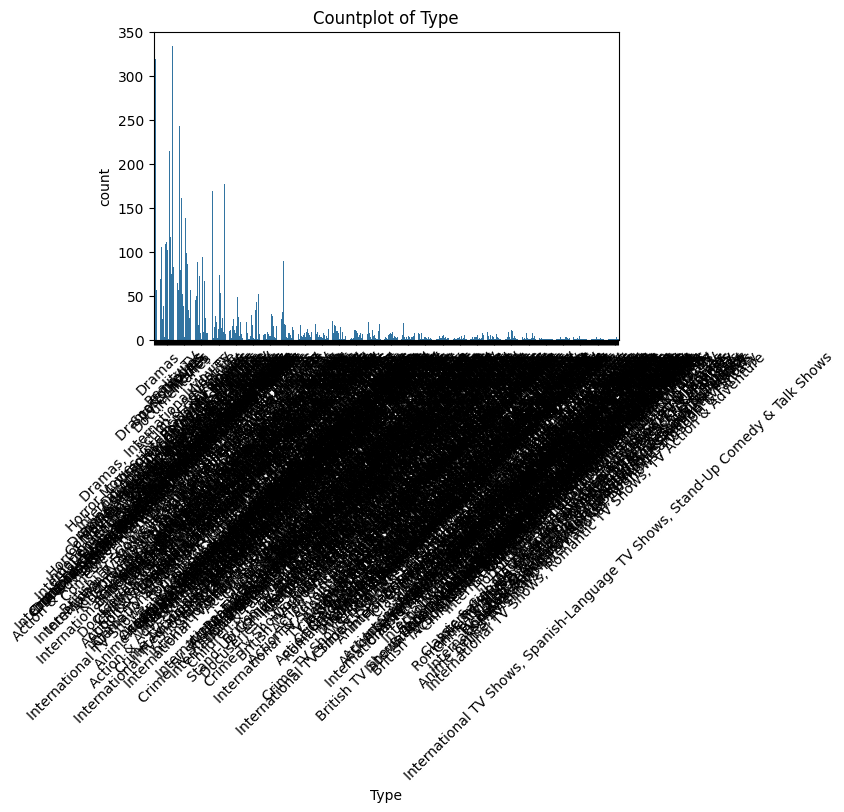

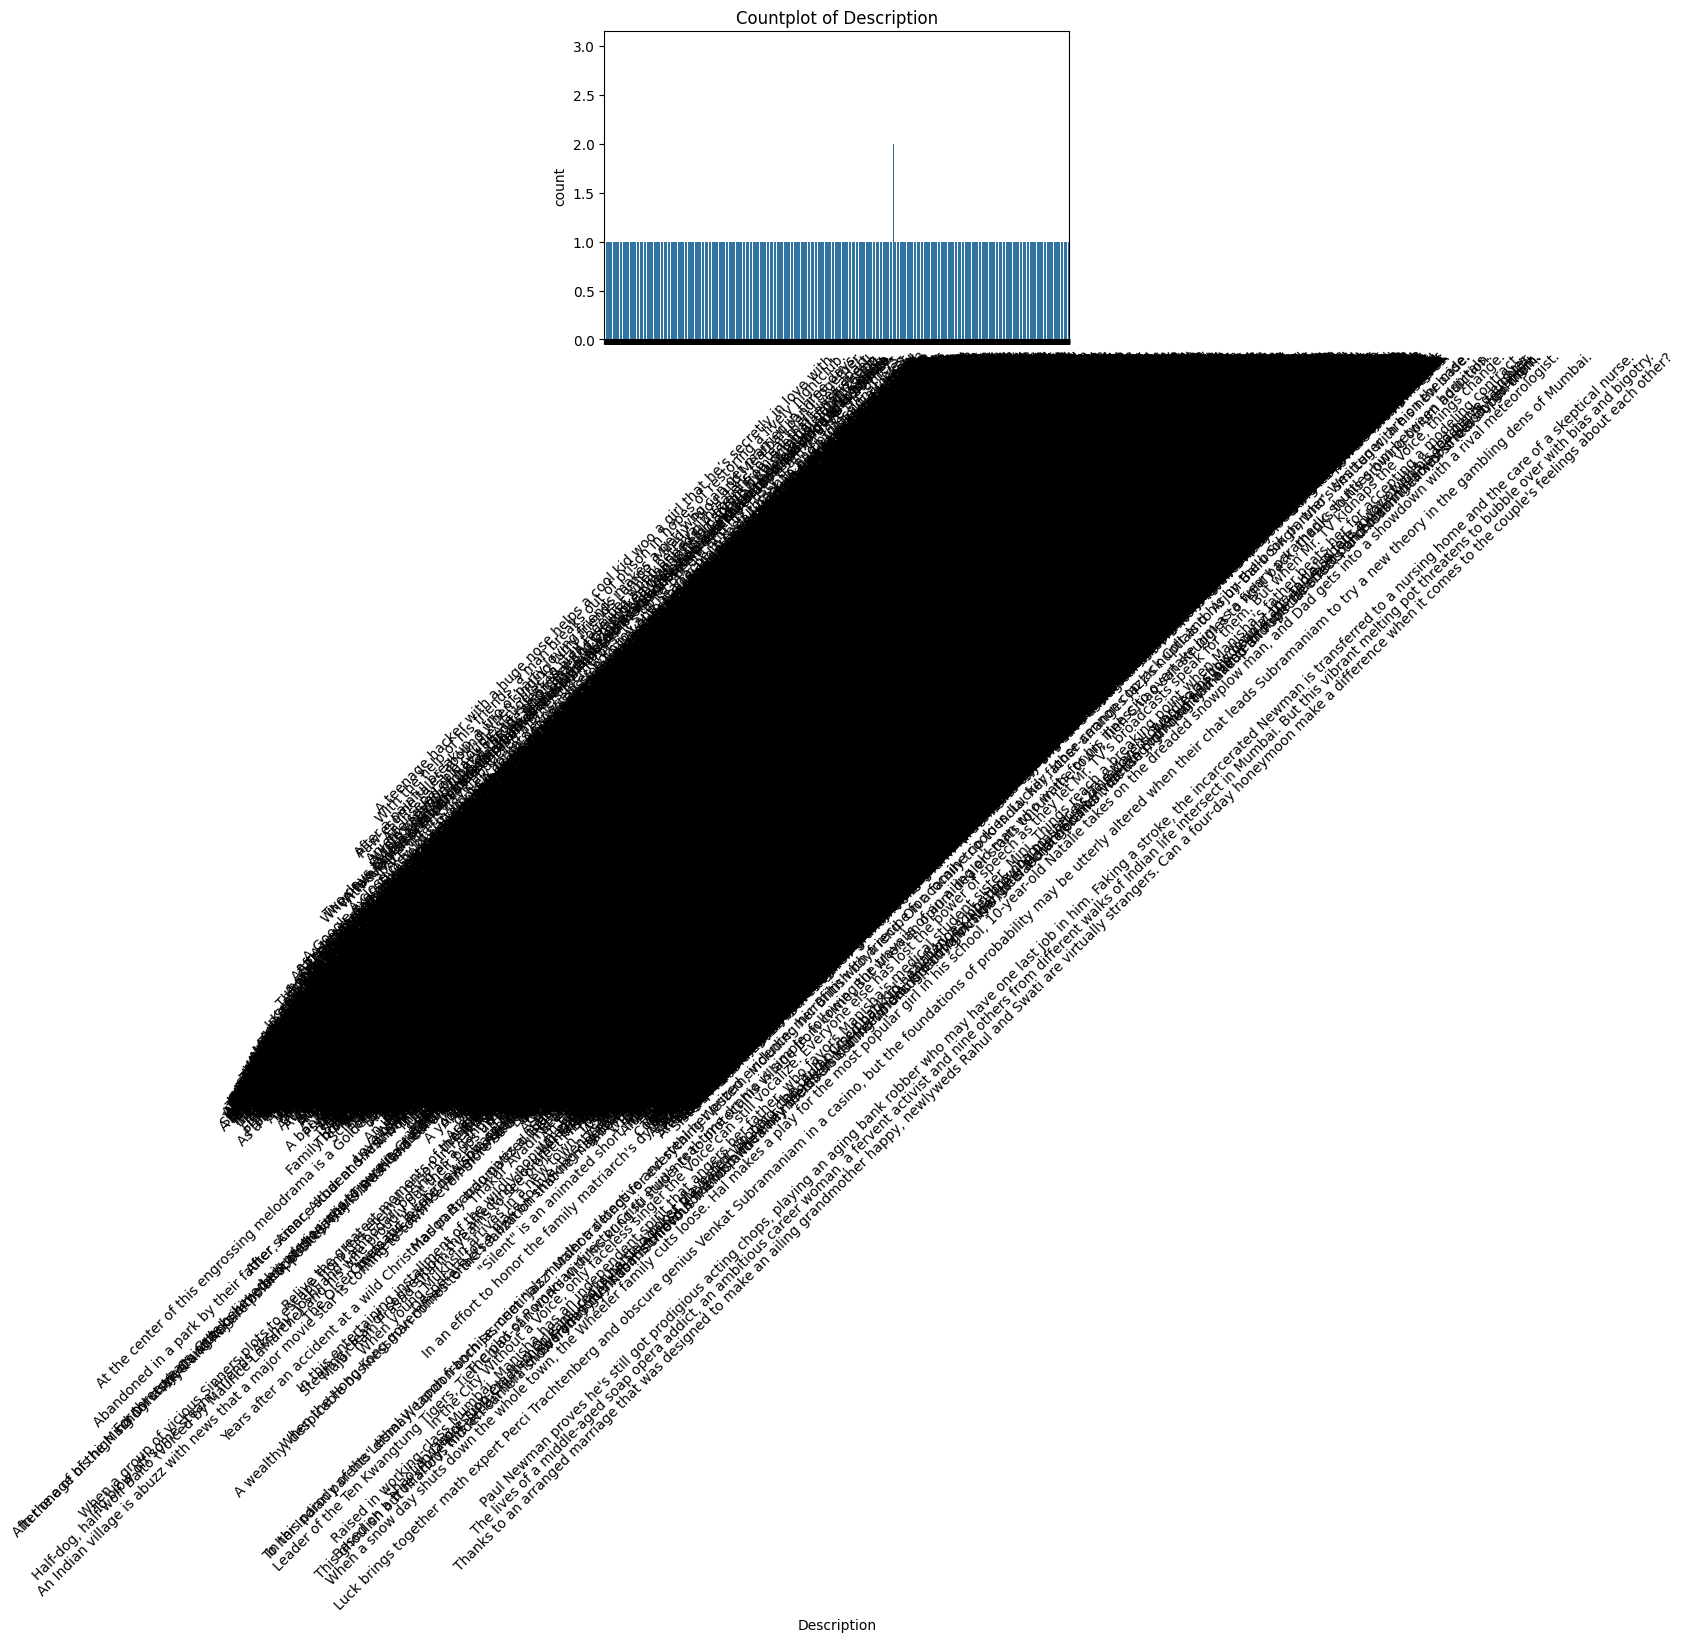

In [17]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_15860\2882886547.py:5: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
C:\Users\hp\AppData\Local\Temp\ipykernel_15860\2882886547.py:5: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(corr, cmap="coolwarm", interpolation="nearest")


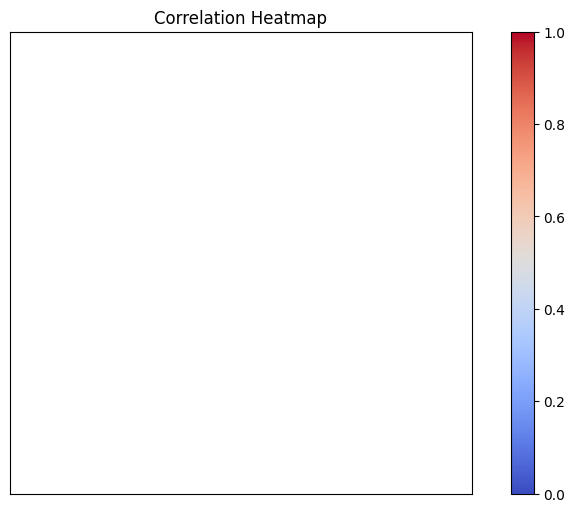

In [19]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = df[num_cols].corr()

plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")

# Annotating correlation values
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}", 
                 ha="center", va="center", color="black")

plt.show()

# Relation between categorical and numerical variable
for col in cat_cols:
    for num in num_cols:
        plt.figure(figsize=(6, 4))
        df.boxplot(column=num, by=col, grid=False)
        plt.title(f"{num} vs {col}")
        plt.suptitle("")  # Remove automatic suptitle
        plt.xticks(rotation=45)
        plt.show()

In [20]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

In [22]:
from scipy import stats

# ANOVA Test between categorical (low cardinality) and numerical variables
for col in cat_cols:
    if df[col].nunique() <= 10:  # only for low-cardinality categorical
        for num in num_cols:
            try:
                groups = [
                    df[df[col] == cat][num].dropna()
                    for cat in df[col].unique()
                ]
                
                # check agar 2 se zyada valid groups hai
                if len(groups) > 1 and all(len(g) > 1 for g in groups):
                    f_stat, p_val = stats.f_oneway(*groups)
                    print(f"ANOVA Test for {col} vs {num}: F = {f_stat:.3f}, p = {p_val:.3f}")
                else:
                    print(f"Skipping {col} vs {num} (not enough valid groups)")
            
            except Exception as e:
                print(f"Error in {col} vs {num}: {e}")

In [23]:
# Check skewness of numerical features
print("\nSkewness:")
print(df[num_cols].skew())

# Check for highly correlated features (>0.9)
cor_matrix = df[num_cols].corr().abs()
high_corr = np.where(cor_matrix > 0.9)
high_corr_pairs = [(num_cols[i], num_cols[j]) for i, j in zip(*high_corr) if i != j and i < j]
print("\nHighly Correlated Features:", high_corr_pairs)


Skewness:
Series([], dtype: float64)

Highly Correlated Features: []
